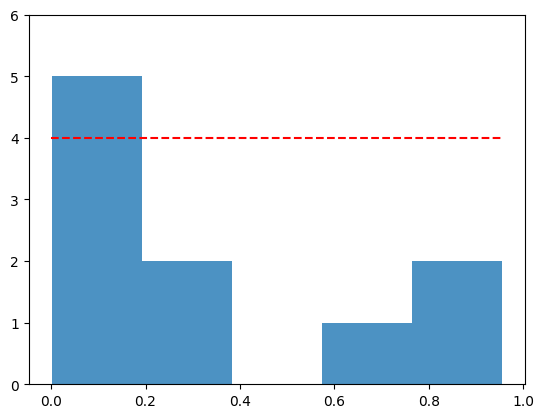

In [42]:
import numpy as np
import pylab as plt

target = 4
beta = 1.0/target

Y = np.random.exponential(beta, 10)
plt.hist(Y, bins=5,lw=0,alpha=.8)
plt.plot([0,max(Y)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()

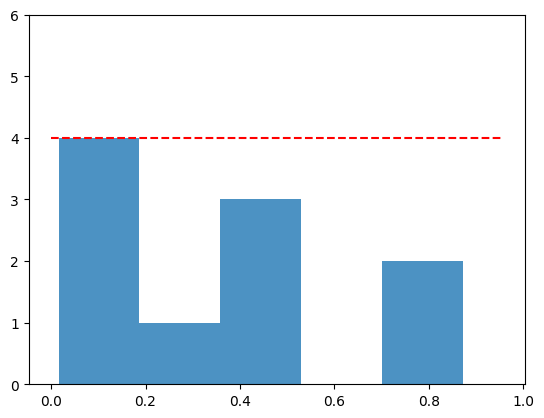

In [46]:
import numpy as np
import pylab as plt

target = 4
beta = 1.0/target

def sample_exponential(lambda_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param

samples = sample_exponential(target, size=10)
plt.hist(samples, bins=5,lw=0,alpha=.8)
plt.plot([0,max(Y)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()


Uchoa et al. 2017 propose that the probability of a point p to receive a customer is proportional to the sum over the available seed points of exp(-distance(p,s)/40). This is not a distribution because the probability would exceed to this 40 value, becoming the proportion factor.
For a density of \lambda*exp(-\lambda/\mu dist(x,s)), the cumulated val is \mu(1-exp(-\lambda/\mu x)), so the proped CDF is just (1-exp(-\lambda/\mu x)).

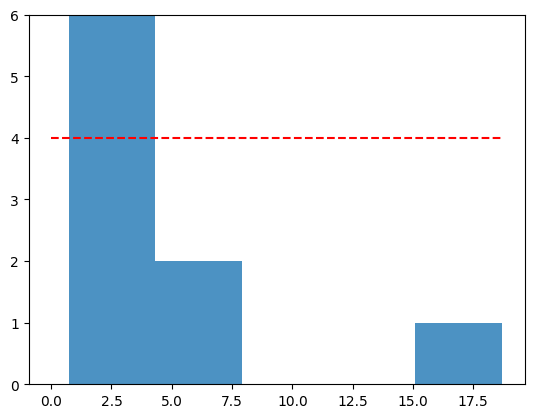

In [ ]:
import numpy as np
import pylab as plt

target = 4
pseudo_mean = 1
beta = 1.0/target

def sample_exponential(lambda_param, mu_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param * mu_param

samples = sample_exponential(lambda_param=pseudo_mean, mu_param=target, size=10)
plt.hist(samples, bins=5,lw=0,alpha=.8)
plt.plot([0,max(samples)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()

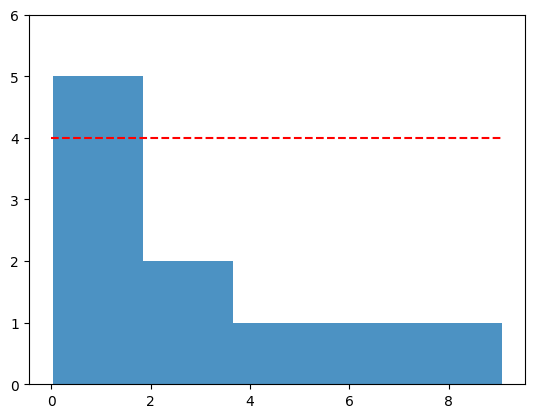

In [148]:
import numpy as np
import pylab as plt

target = 4
pseudo_mean = 2
beta = 1.0/target

def sample_exponential(lambda_param, mu_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param * mu_param

samples = sample_exponential(lambda_param=pseudo_mean, mu_param=target, size=10)
plt.hist(samples, bins=5,lw=0,alpha=.8)
plt.plot([0,max(samples)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()

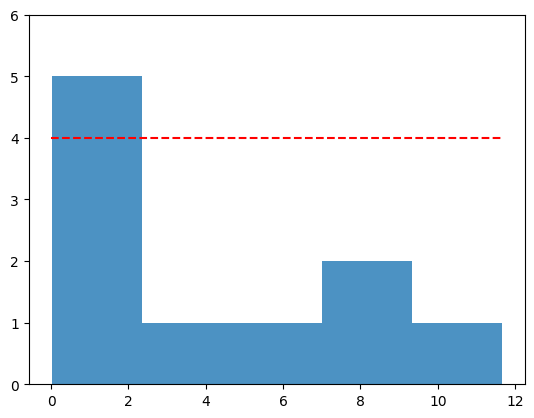

In [200]:
import numpy as np
import pylab as plt

target = 4
pseudo_mean = 0.42
beta = 1.0/target

def sample_exponential(lambda_param, mu_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param * mu_param

samples = sample_exponential(lambda_param=pseudo_mean, mu_param=target, size=10)
plt.hist(samples, bins=5,lw=0,alpha=.8)
plt.plot([0,max(samples)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()

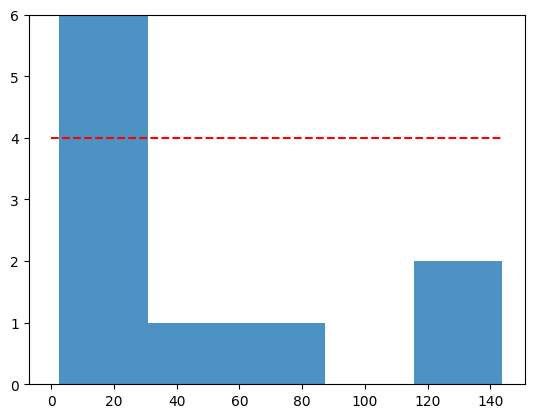

In [149]:
import numpy as np
import pylab as plt

target = 4
pseudo_mean = 0.1
beta = 1.0/target

def sample_exponential(lambda_param, mu_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param * mu_param

samples = sample_exponential(lambda_param=pseudo_mean, mu_param=target, size=10)
plt.hist(samples, bins=5,lw=0,alpha=.8)
plt.plot([0,max(samples)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()

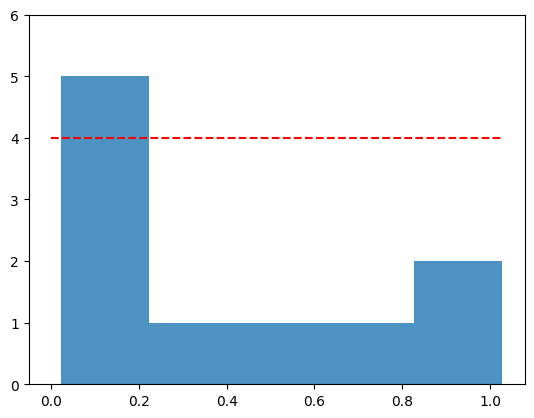

In [145]:
import numpy as np
import pylab as plt

target = 4
pseudo_mean = 10
beta = 1.0/target

def sample_exponential(lambda_param, mu_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param * mu_param

samples = sample_exponential(lambda_param=pseudo_mean, mu_param=target, size=10)
plt.hist(samples, bins=5,lw=0,alpha=.8)
plt.plot([0,max(samples)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()

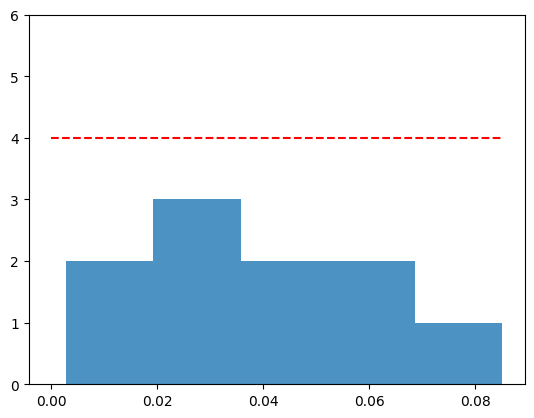

In [146]:
import numpy as np
import pylab as plt

target = 4
pseudo_mean = 100
beta = 1.0/target

def sample_exponential(lambda_param, mu_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param * mu_param

samples = sample_exponential(lambda_param=pseudo_mean, mu_param=target, size=10)
plt.hist(samples, bins=5,lw=0,alpha=.8)
plt.plot([0,max(samples)],[target,target],'r--')
plt.ylim(0,target*1.5)
plt.show()

I like mu=4, lambda=0.5
Now we need to combine it with a circular distribution

In [204]:
import numpy as np
import pylab as plt

target = 4
pseudo_mean = 0.5
beta = 1.0/target

def sample_exponential_uchoa(lambda_param, mu_param, size=1):
    u = np.random.uniform(0, 1, size)
    return -np.log(1 - u) / lambda_param * mu_param

distances = sample_exponential_uchoa(lambda_param=pseudo_mean, mu_param=target, size=10)

def sample_points(size, lambda_param, mu_param, center):
    from math import pi
    distances = sample_exponential_uchoa(lambda_param=lambda_param, mu_param=mu_param, size=size)
    sample_pi = np.random.uniform(0, 2*pi, size)
    x0, y0 = center
    x = x0 + distances * np.cos(sample_pi)
    y = y0 + distances * np.sin(sample_pi)
    return np.stack((x, y), axis=-1)
    

center = (50, 50)

# Convert to Cartesian coordinates
points = sample_points(40,pseudo_mean,target,center).astype(int)

# Plot
plt.figure(figsize=(100, 100))
plt.plot(center[0], center[1], 'ro', label='Center')  # red dot for center
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Points')  # points
plt.axis('equal')  # keep aspect ratio square
plt.grid(True)
plt.legend()
plt.title('Polar to Cartesian Points')
plt.xlabel('x')
plt.ylabel('y')

# Optionally, draw lines from center to each point
for x, y in points:
    plt.plot([center[0], x], [center[1], y], 'k--', alpha=0.5)

plt.show()


To create the surface this distribution is not enough. We'll do something different: just sample and find the closest value
(1) Get all seeds
(2) Calculate the Uchoa et al. 2017 function for all points in the grid
(3) Sum all values to get the normalizing factor
(4) Build an empirical CDF by summing over all x,y between 0,0 and the point in the grid.
(5) Normalize
(6) Sample u = Uniform[0,1]
(7) Find the closest value

In [205]:
from typing import List, Dict, Any, Tuple

In [206]:
# 1 : get all seeds
def produce_seeds(n_seeds: int, x_min=0, x_max=100, y_min=0, y_max=100) -> List[Tuple[int,int]]:
    from random import uniform
    
    seeds = []
    for _ in range(n_seeds):
        x = int(uniform(x_min, x_max))
        y = int(uniform(y_min, y_max))
        seeds.append((x,y))
    return(seeds)

In [207]:
# 2 : calculate Uchoa function
def pseudo_dist(seeds: List[Tuple[int,int]], lambda_val: float, point:Tuple[int,int]) -> float:
    from math import exp, sqrt
    val = 0
    for seed in seeds:
        s_x, s_y = seed
        x, y = point
        val += exp(-1/lambda_val*sqrt((s_x-x)**2+(s_y-y)**2))
    return val

In [247]:
# 3 : get normalizing factor
def get_normalizer(point_score: Dict[Tuple[int,int],float]) -> float:
    return max(point_score.values())

In [252]:
# 4 : build pseudo-CDF
def uchoa_empirical_distro_builder(point_score: Dict[Tuple[int,int],float]) -> Dict[Tuple[int,int], float]:
    probability = {}
    for x in range(0,101):
        for y in range(0,101):
            probability[x,y] = point_score[x,y]
            for dx in range(0, x):
                for dy in range(0,y):
                    probability[x,y] += point_score[dx, dy]
    return probability

In [251]:
# 5 : normalize
def normalize(dict_to_normalize: Dict[Tuple[int,int],float], normalizer:float) -> Dict[Tuple[int,int], float]:
    return {k: v / normalizer for k, v in dict_to_normalize.items()}

In [210]:
# 7 : Find the closest point
def find_point(probability_dict: Dict[Tuple[int,int],float], probability) -> Tuple[int,int]:
    return min(probability_dict, key=lambda k: abs(probability_dict[k] - probability))

In [296]:
from random import uniform
n_seeds = 10
n_samples = 100

seeds = produce_seeds(n_seeds=n_seeds)
pseudo_dist_vals = {(x,y): pseudo_dist(seeds, 10, (x,y)) for x in range(101) for y in range(101)}
# uchoa_cdf_raw = uchoa_empirical_distro_builder(pseudo_dist_vals)
normalizer = get_normalizer(pseudo_dist_vals)
# uchoa_cdf = normalize(uchoa_cdf_raw, normalizer)

samples = []
for _ in range(n_samples):
    prob = uniform(0,normalizer)
    samples.append(find_point(pseudo_dist_vals, probability=prob))

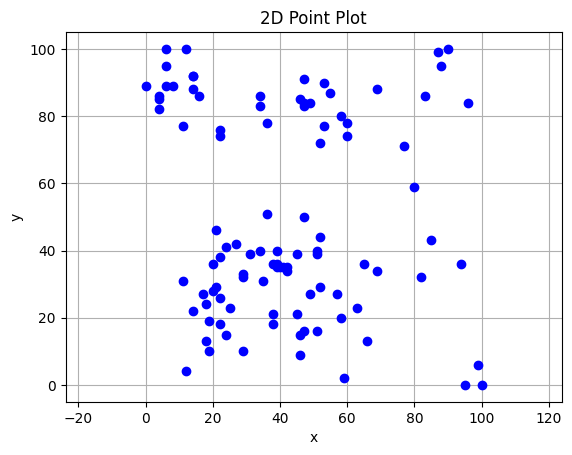

In [297]:
import pylab as plt

x, y = zip(*samples)

# Plot
plt.figure()
plt.plot(x, y, 'bo')  # 'bo' = blue circles
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Point Plot')
plt.grid(True)
plt.axis('equal')  # Keeps the aspect ratio square
plt.show()

In [217]:
def graph_dict(data):
    # Unpack into 2D grid
    points = list(data.keys())
    values = list(data.values())
    x_coords, y_coords = zip(*points)

    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)

    # Create a 2D array grid of values
    Z = np.full((y_max - y_min + 1, x_max - x_min + 1), np.nan)
    for (x, y), value in data.items():
        Z[y - y_min, x - x_min] = value  # row = y, col = x

    # Plot using imshow with red/white/blue colormap
    plt.figure(figsize=(6, 5))
    plt.imshow(Z, origin='lower', cmap='bwr', extent=[x_min, x_max + 1, y_min, y_max + 1])
    plt.colorbar(label='Value')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Surface Plot with Red/Blue Color Map')
    plt.grid(False)
    plt.show()

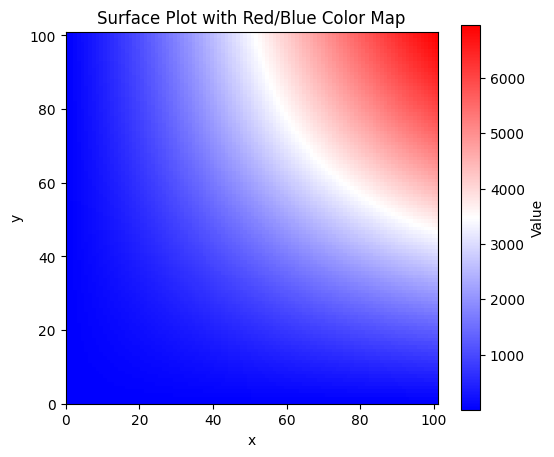

In [ ]:
# graph_dict(uchoa_cdf)

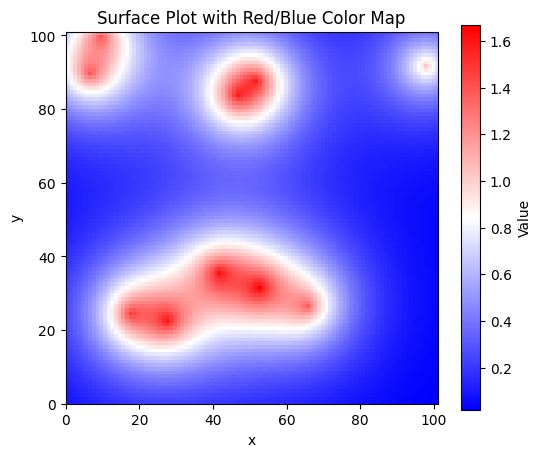

In [298]:
graph_dict(pseudo_dist_vals)